# Lab 0 - Python and Jupyter notebook introduction

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Warm-up Exercises 

Try the following commands on your jupyter notebook or python editor and see what output they produce.

In [19]:
a = 1 + 5
b = 2
c = a + b
print(a / b)
print(a // b)
print(a - b)
print(a * b)
print(a**b)

3.0
3
4
12
36


In [20]:
a = np.array([[3, 1],
              [1, 3]])
b = np.array([[3],
              [5]])
print(a * b)
print(np.dot(a, b))
print(np.dot(b.T, a))
c = a**(-1.0)
print(c * a)

[[ 9  3]
 [ 5 15]]
[[14]
 [18]]
[[14 18]]
[[1. 1.]
 [1. 1.]]


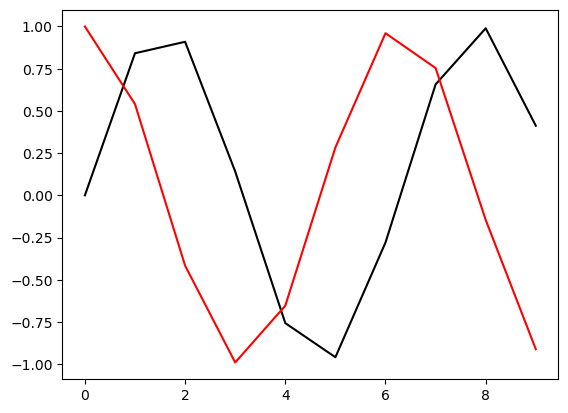

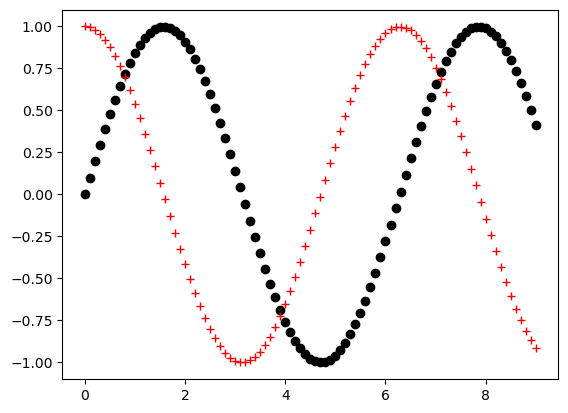

In [21]:
t = np.arange(10)
g = np.sin(t)
h = np.cos(t)
plt.figure()
plt.plot(t, g, 'k', t, h, 'r');

t = np.arange(0, 9.1, 0.1)
g = np.sin(t)
h = np.cos(t)
plt.figure()
plt.plot(t, g, 'ok', t, h, '+r');

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[1.00230524e+00 1.78186583e+01 3.16774344e+02 5.63151182e+03
 1.00115196e+05 1.77981556e+06 3.16409854e+07 5.62503203e+08
 1.00000000e+10]
[1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01]


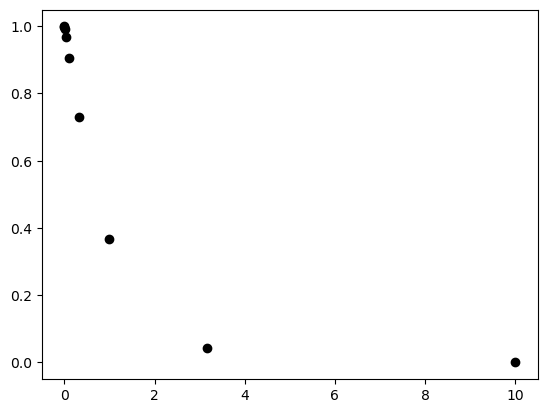

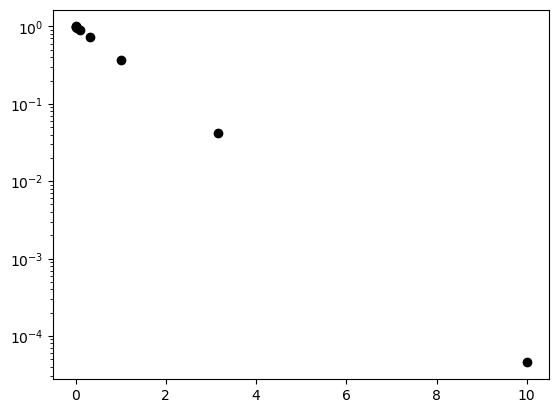

In [22]:
t = np.linspace(0, 10, 20)
print(t)
t = np.logspace(0.001, 10, 9)
print(t)
t = np.logspace(-3, 1, 9)
print(t)
y = np.exp(-t)

plt.figure()
plt.plot(t, y, 'ok')
plt.figure()
plt.semilogy(t, y, 'ok')

# Integration Function

Here is a more complicated function that computes the integral $y(x)$ with interval $dx$:

$$c = \int y(x) dx \sim \sum_{i=1}^N y_i dx_i .$$

It can deal with both cases of even and uneven sampling.

In [23]:
def integral(y, dx):
    # function c = integral(y, dx)
    # To numerically calculate integral of vector y with interval dx:
    # c = integral[ y(x) dx]
    # ------ This is a demonstration program ------
    n = len(y) # Get the length of vector y
    nx = len(dx) if np.iterable(dx) else 1
    c = 0 # initialize c because we are going to use it
    # dx is a scalar <=> x is equally spaced
    if nx == 1: # ’==’, equal to, as a condition
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx / 2
    # x is not equally spaced, then length of dx has to be n-1
    elif nx == n-1:
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx[k-1] / 2
    # If nx is not 1 or n-1, display an error messege and terminate program
    else:
        print('Lengths of y and dx do not match!')
    return c


Use this function (`integral`) to compute $\int_0^\pi \sin(t) dt$
with an evenly sampled time series.

1.9796508112164835


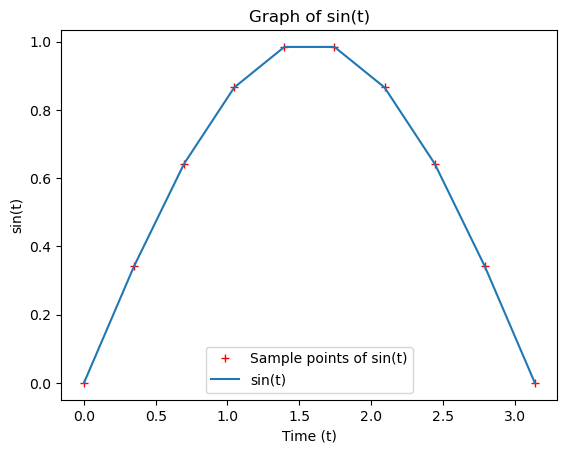

In [63]:
# number of samples
nt = 10
# generate time vector
t = np.linspace(0, np.pi, nt)
# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.sin(t)
plt.plot(t, y, 'r+', label = 'Sample points of sin(t)')

c = integral(y, dt)
plt.plot(t, y, label = 'sin(t)')

# Add labels and legend
plt.title('Graph of sin(t)')
plt.xlabel('Time (t)')
plt.ylabel('sin(t)')
plt.legend()

print(c)

## Part 1

First plot $y(t)$. Is the output $c$ value what you are expecting for
$\int_0^\pi \sin(t) dt$? How can you improve the accuracy of your computation?

The output value is not precisely what we were expecting for the definite integral of sin(t) from 0 to π, since this value is 2 and instead we got 1.9796508112164835. In order to improve the accuracy of our computation, we can increase the sample size (i.e, increase the value of the variable 'nt') to some large number such as 10000. 

1.9999999835473712


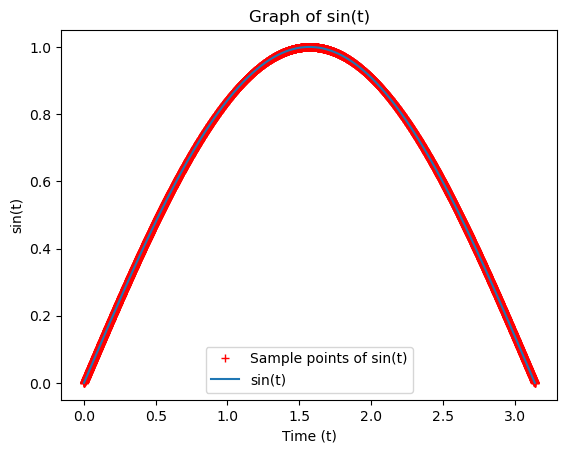

In [66]:
# number of samples
nt = 10000
# generate time vector
t = np.linspace(0, np.pi, nt)
# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.sin(t)
plt.plot(t, y, 'r+', label = 'Sample points of sin(t)')
plt.plot(t, y, label = 'sin(t)')
plt.xlabel('Time (t)')
plt.ylabel('sin(t)')
plt.title('Graph of sin(t)')
plt.legend()
c = integral(y, dt)
print(c)

## Part 2

For an unevenly spaced time series that depicts $\sin(4 \pi t^2)$ (so-called chirp function),
compute $\int_0^1 \sin(4 \pi t^2) dt$ (saved as uneven.py if not using a Jupyter notebook).

0.1360968494483698


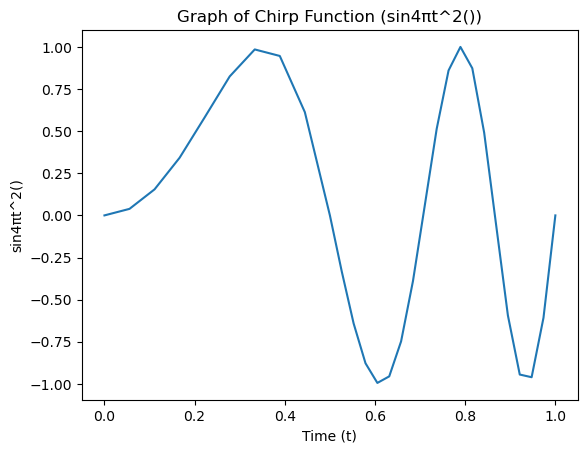

In [62]:
nt = 10
# sampling between [0,0.5]
t1 = np.linspace(0, 0.5, nt)
# double sampling between [0.5,1]
t2 = np.linspace(0.5, 1, 2*nt)
# concatenate time vector
t = np.concatenate((t1[:-1], t2))
# compute y values (
y = np.sin(4 * np.pi * t**2)
plt.plot(t, y)
plt.xlabel('Time (t)')
plt.ylabel('sin4πt^2()')
plt.title('Graph of Chirp Function (sin4πt^2())')
# compute sampling interval vector
dt = t[1:] - t[:-1]
c = integral(y, dt)
print(c)

Show your plot of $y(t)$ for $nt = 10$. Try different $nt$ values and see
how the integral results change. Write a `for` loop around the statements above to try
a series of $nt$ values (e.g, 10, 25, 50, 100, 1000, 5000) and generate a plot of $c(nt)$.
What value does $c$ converge to after using larger and larger $nt$? (Please include your
modified Python code.)

# Accuracy of Sampling

nt values: [10, 15, 50, 100, 1000, 50000]
c values: [0.1360968494483698, 0.1367636311723366, 0.1371388358952252, 0.13716087327575752, 0.13716768701408735, 0.13716775276571652]
Converged c value: 0.13716775276571652


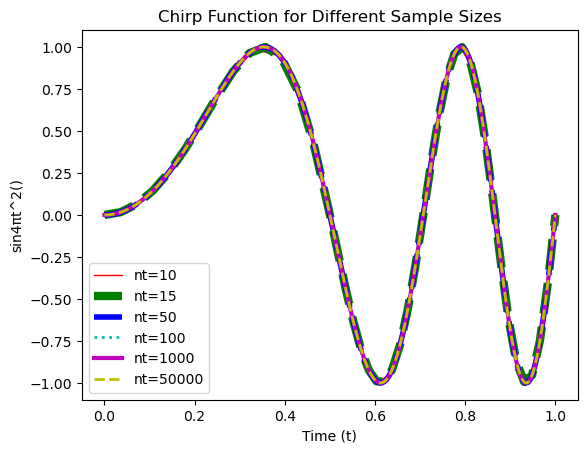

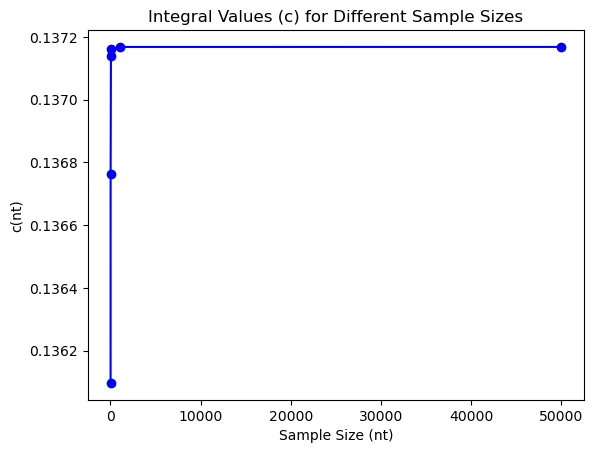

In [72]:
# Declaring a list of various sample sizes for testing
values = [10, 15, 50, 100, 1000, 50000]

# List where results will be added
c_values = []

# Different line styles, thicknesses, and colors to distinguish plots more easily
line_styles = ['-', '--', '-.', ':', '-', '--']
line_thicknesses = [1, 6, 4, 2, 3, 2]
line_colors = ['r', 'g', 'b', 'c', 'm', 'y']

for i, nt in enumerate(values):
    # sampling between [0,0.5]
    t1 = np.linspace(0, 0.5, nt)
    # double sampling between [0.5,1]
    t2 = np.linspace(0.5, 1, 2*nt)
    # concatenate time vector
    t = np.concatenate((t1[:-1], t2))
    # compute y values
    y = np.sin(4 * np.pi * t**2)
    
    # compute sampling interval vector
    dt = t[1:] - t[:-1]
    c = integral(y, dt)
    c_values.append(c)
    
    # Plotting with different styles
    plt.plot(t, y, linestyle=line_styles[i], linewidth=line_thicknesses[i], color=line_colors[i], label=f'nt={nt}')

# Creating the legend and labels
plt.xlabel('Time (t)')
plt.ylabel('sin4πt^2()')
plt.title('Chirp Function for Different Sample Sizes')
plt.legend()

# Plotting c(nt)
plt.figure()
plt.plot(values, c_values, marker='o', linestyle='-', color='b')
plt.xlabel('Sample Size (nt)')
plt.ylabel('c(nt)')
plt.title('Integral Values (c) for Different Sample Sizes')


print("nt values:", values)
print("c values:", c_values)
print("Converged c value:", c_values[-1])


Based on the values of c, it seems that c converges to approximately 0.1372 (rounded to 4dp).

Let us sample the function $g(t) = \cos(2 \pi f t)$ at sampling interval $dt = 1$, for frequency values of
$f = 0, 0.25, 0.5, 0.75, 1.0$ hertz.

In each case, plot on the screen the points of the resulting time series (as isolated red crosses) to
see how well it approximates $g(t)$ (plotted as a blue-dotted line, try a very small $dt$ fine
sampling). Submit only plots for frequencies of $0.25$ and $0.75$
Hertz, use xlabel, ylabel, title commands to annotate each plot.
For each frequency that you investigated, do you think the sampling time series is a fair representation of
the original time series $g(t)$? What is the apparent frequency for the sampling time series? (Figure out
after how many points ($N$) the series repeats itself, then the apparent frequency = $1/(N*dt)$. You can do this either
mathematically or by inspection. A flat time series has apparent frequency = 0.) Can you guess with a
sampling interval of $dt = 1$, what is the maximum frequency $f$ of $g(t)$
such that it can be fairly represented by the discrete time series? (Please attach your Python code.)

Apparent Frequency for 0.25 Hz: 0.25 Hz
Apparent Frequency for 0.75 Hz: 0.5 Hz


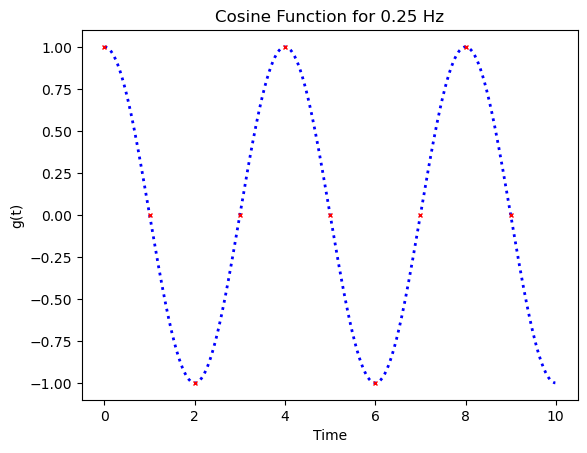

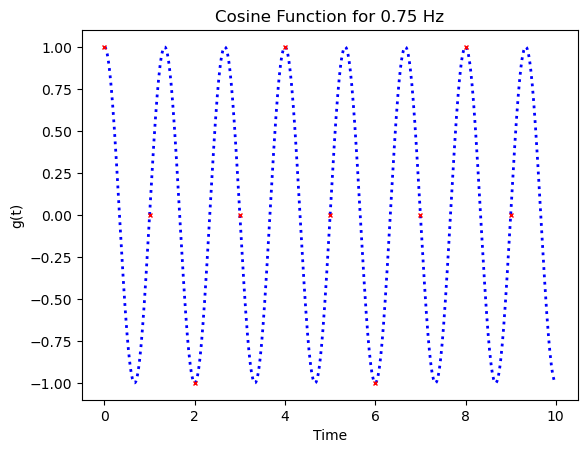

In [61]:
# Sampling interval
dt = 1

# Finer interval
dt_f = 0.01

# Sampling between [0,10] 
t = np.arange(0, 10, dt)

# Finer sampling
t_finer = np.arange(0, 10, dt_f)

# List of frequencies to test
freq = [0, 0.25, 0.5, 0.75, 1.0]

#for i in range(len(freq)):
 #   plt.plot(t, np.cos(2*np.pi*freq[i]*t), 'x', label=f'{freq[i]}Hz')
    
# Plot for 0.25 Hz
plt.figure()  # Create a new figure
plt.plot(t_finer, np.cos(2 * np.pi * 0.25 * t_finer), linewidth=2, linestyle='dotted', color='b')
plt.plot(t, np.cos(2 * np.pi * 0.25 * t), 'rx', markersize=3)
plt.xlabel('Time')
plt.ylabel('g(t)')
plt.title('Cosine Function for 0.25 Hz')

# Plot for 0.75 Hz
plt.figure()  # Create another new figure
plt.plot(t_finer, np.cos(2 * np.pi * 0.75 * t_finer), linewidth=2, linestyle='dotted', color='b')
plt.plot(t, np.cos(2 * np.pi * 0.75 * t), 'rx', markersize=3)
plt.xlabel('Time')
plt.ylabel('g(t)')
plt.title('Cosine Function for 0.75 Hz')

# Number of points after which each series repeats itself
N_0_25 = 4 # for 0.25Hz
N_0_75 = 2 # for 0.75Hz

# Calculating apparent frequencies
apparent_frequency_0_25 = 1 / (N_0_25 * dt)
apparent_frequency_0_75 = 1 / (N_0_75 * dt)

print(f"Apparent Frequency for 0.25 Hz: {apparent_frequency_0_25} Hz")
print(f"Apparent Frequency for 0.75 Hz: {apparent_frequency_0_75} Hz")


The apparent frequencies for the actual frequencies of 0.25 Hz and 0.75 Hz are 0.25 Hz and 0.5 Hz, respectively. This suggests that the discrete time series effectively captures the periodicity of the 0.25Hz wave, but less so of the 0.75Hz one. Given these results, one might expect that the maximum frequency fairly representable by the discrete time series, with a sampling interval of 1 second, is approximately 0.5 Hz, as this would explain why the 0.75Hz wave's apparent frequency is 'capped off' at this amount. Furthermore, 0.5Hz falls between the two tested frequencies, which makes sense since we know that 0.25Hz is precisely represented, while 0.75Hz is past the maximum frequency to be accurately represented.